In [ ]:
###坐标现转换，不要转换后重新读取

In [45]:
#运行这个代码可以让Python不显示warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import geopandas
import geopandas as gpd
import pyproj

In [46]:
#读取22年5月1日22路车的运行GPS数据
BUS_GPS = pd.read_csv(r'F:\data\22_5_1\BUS_GPS.csv',encoding='gbk')#这样读取默认第一行是表头
#22线路数据
line = pd.read_csv(r'F:\data\22_5_1\22路线路.csv',encoding='gbk')#默认第一行是表头
#所22路车的站点数据
stop = pd.read_csv(r'F:\data\22_5_1\stations.csv',encoding='utf-8')#默认第一行是表头

In [48]:
#-*-coding=utf-8 -*-
import pyproj
import pandas as pd
import numpy as np
#data = pd.read_csv("test.csv",sep=',',header='infer')#将第一行作为表头
p1 = pyproj.Proj(init="epsg:4326")#wgs坐标系统的EPSG Code
p2 = pyproj.Proj(init="epsg:32651")#UTM 51N坐标系统的EPSG Code
lonprj, latprj = pyproj.transform(p1, p2,stop['LONGITUDE'], stop['LATITUDE'])
lonprj2, latprj2 = pyproj.transform(p1, p2,line['LONGITUDE'], line['LATITUDE'])
lonprj3, latprj3 = pyproj.transform(p1, p2,BUS_GPS['LONGITUDE'], BUS_GPS['LATITUDE'])
#xy = list(zip(lonprj,latprj))#封装数组，使每一个经度对应一个纬度
xy
lonprj
#np.savetxt("UTM51.txt",xy,fmt="%.5f")#小数点后保留5位

array([160821.70311783, 160783.46458439, 161258.7855527 , 163613.92085682,
       162374.24764529, 162751.77280319, 161001.8672977 , 158470.85136001,
       158385.95507101, 163732.36205623, 163665.39140595, 163287.69010626,
       160903.21054101, 160704.63909799, 160823.3138015 , 160907.51208469,
       163165.38507949, 163593.560064  , 163758.510857  , 157264.87346034,
       156770.23990966, 159863.29165388, 160557.67463651, 160494.3411635 ,
       159920.69217706, 159345.45930437, 156149.92832424, 158763.24940751,
       158896.83013401, 156884.10120484, 156877.02562001, 156262.64018043,
       156258.37148355, 156757.95439857, 160865.87519198, 160883.8380609 ,
       163322.23436117, 161389.65189554, 162975.45980487, 163021.47402861,
       162885.74684809, 162787.50358118, 162690.48206712, 162617.04561542,
       163159.97558963, 163100.90488711, 161749.91921632, 161459.06972963,
       163074.06989724, 161693.14985913, 163002.40410822, 162975.80185088,
       156165.24923386, 1

In [49]:
##将数组转换为PD
stop['lons']=pd.DataFrame(lonprj)
stop['lats']=pd.DataFrame(latprj)
line['lons']=pd.DataFrame(lonprj2)
line['lats']=pd.DataFrame(latprj2)
BUS_GPS['lons']=pd.DataFrame(lonprj3)
BUS_GPS['lats']=pd.DataFrame(latprj3)

In [50]:
from shapely.geometry import Point
#对公交GPS点生成点要素，并转换为一个GeoDataFrame，方便后续的地图匹配
lon=BUS_GPS['lons']
lat=BUS_GPS['lats']
list=[]
for i in range(0,145261):###!!!!换成len
    g=Point(lon[i],lat[i])
    list.append(g)
    pass
list = gpd.GeoDataFrame(list)###转换为pd形式
BUS_GPS['geometry']=list
BUS_GPS['geometry']
#BUS_GPS['geometry'] = BUS_GPS.apply(lambda r:Point(r['lon'],r['lat']),axis = 1)
#BUS_GPS = gpd.GeoDataFrame(BUS_GPS)

0          POINT (-7274487.38092442 19995929.886041995)
1          POINT (163772.0641694304 3580707.4185856134)
2          POINT (163772.0641694304 3580707.4185856134)
3          POINT (163772.0641694304 3580707.4185856134)
4          POINT (163772.0641694304 3580707.4185856134)
                              ...                      
145256    POINT (163742.14132748178 3580734.9611649774)
145257    POINT (163742.14132748178 3580734.9611649774)
145258    POINT (163742.14132748178 3580734.9611649774)
145259    POINT (163742.14132748178 3580734.9611649774)
145260    POINT (163742.14132748178 3580734.9611649774)
Name: geometry, Length: 145261, dtype: object

In [51]:
##生成站点的的点要素
lon=stop['lons']
lat=stop['lats']
stoplist=[]
for i in range(0,93):#换成len
    g=Point(lon[i],lat[i])
    stoplist.append(g)
    pass
stoplist = gpd.GeoDataFrame(stoplist)###转换为pd形式
list
stop['geometry']=stoplist
stop['geometry']

0      POINT (160821.7031178251 3587352.9958234834)
1      POINT (160783.4645843889 3587448.9168113973)
2      POINT (161258.78555269964 3586435.052203559)
3      POINT (163613.92085681733 3578562.157219473)
4     POINT (162374.24764529016 3577959.6162920306)
                          ...                      
88    POINT (159362.65101368434 3587812.2767862207)
89    POINT (156339.01356265525 3587741.0005499916)
90     POINT (156315.64636858308 3587779.898064424)
91     POINT (161573.66997635894 3578753.687211083)
92     POINT (161592.8339826985 3578759.7082307916)
Name: geometry, Length: 93, dtype: object

In [52]:
#生成线路的线要素
from shapely.geometry import LineString
dianlon=line['lons']
dianlat=line['lats']
dianlist=[]
for i in range(0,860):
    g=(dianlon[i],dianlat[i])
    dianlist.append(g)
    pass
dianlist
linestr = LineString(dianlist)
line['geometry']=linestr
line['geometry']

0      LINESTRING (155966.71833154128 3589598.3713578...
1      LINESTRING (155966.71833154128 3589598.3713578...
2      LINESTRING (155966.71833154128 3589598.3713578...
3      LINESTRING (155966.71833154128 3589598.3713578...
4      LINESTRING (155966.71833154128 3589598.3713578...
                             ...                        
855    LINESTRING (155966.71833154128 3589598.3713578...
856    LINESTRING (155966.71833154128 3589598.3713578...
857    LINESTRING (155966.71833154128 3589598.3713578...
858    LINESTRING (155966.71833154128 3589598.3713578...
859    LINESTRING (155966.71833154128 3589598.3713578...
Name: geometry, Length: 860, dtype: object

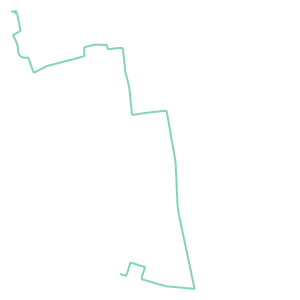

In [53]:
line['geometry'].iloc[1]##线路shp

In [54]:
#地图匹配
lineshp=line['geometry'].iloc[1]
BUS_GPS['project'] = BUS_GPS['geometry'].apply(lambda r:lineshp.project(r))
#原始的坐标点存储在一个字段中
BUS_GPS['geometry_orgin'] = BUS_GPS['geometry']
#生成匹配的坐标点
BUS_GPS['geometry'] = BUS_GPS['project'].apply(lambda r:lineshp.interpolate(r))###差值拟合匹配
BUS_GPS['project']

0             0.000000
1         17143.580910
2         17143.580910
3         17143.580910
4         17143.580910
              ...     
145256    17122.355409
145257    17122.355409
145258    17122.355409
145259    17122.355409
145260    17122.355409
Name: project, Length: 145261, dtype: float64

In [55]:
#计算第一个点的原始点和匹配点之间的距离
BUS_GPS['geometry_orgin'].iloc[0].distance(BUS_GPS['geometry'].iloc[0])

18010534.74749894

In [56]:
#批量计算原始点和匹配点之间的距离
BUS_GPS['diff'] = BUS_GPS.apply(lambda r:r['geometry_orgin'].distance(r['geometry']),axis = 1)
BUS_GPS['diff']

0         1.801053e+07
1         5.906171e+02
2         5.906171e+02
3         5.906171e+02
4         5.906171e+02
              ...     
145256    5.670449e+02
145257    5.670449e+02
145258    5.670449e+02
145259    5.670449e+02
145260    5.670449e+02
Name: diff, Length: 145261, dtype: float64

In [57]:
#储存
#stop.to_csv(r'F:\data\22_5_1\站匹配完成_7_6.csv',index=None)

In [58]:
#储存
#line.to_csv(r'F:\data\22_5_1\线匹配完成_7_6.csv',index=None)

In [59]:
#储存
#BUS_GPS.to_csv(r'F:\data\22_5_1\BUS匹配完成_7_6.csv',index=None)

In [60]:
#读取保存结果
#stop = pd.read_csv(r'F:\data\22_5_1\站匹配完成_7_6.csv')
#line = pd.read_csv(r'F:\data\22_5_1\线匹配完成_7_6.csv')
#BUS_GPS = pd.read_csv(r'F:\data\22_5_1\BUS匹配完成_7_6.csv',encoding='gbk')#这样读取默认第一行是表头

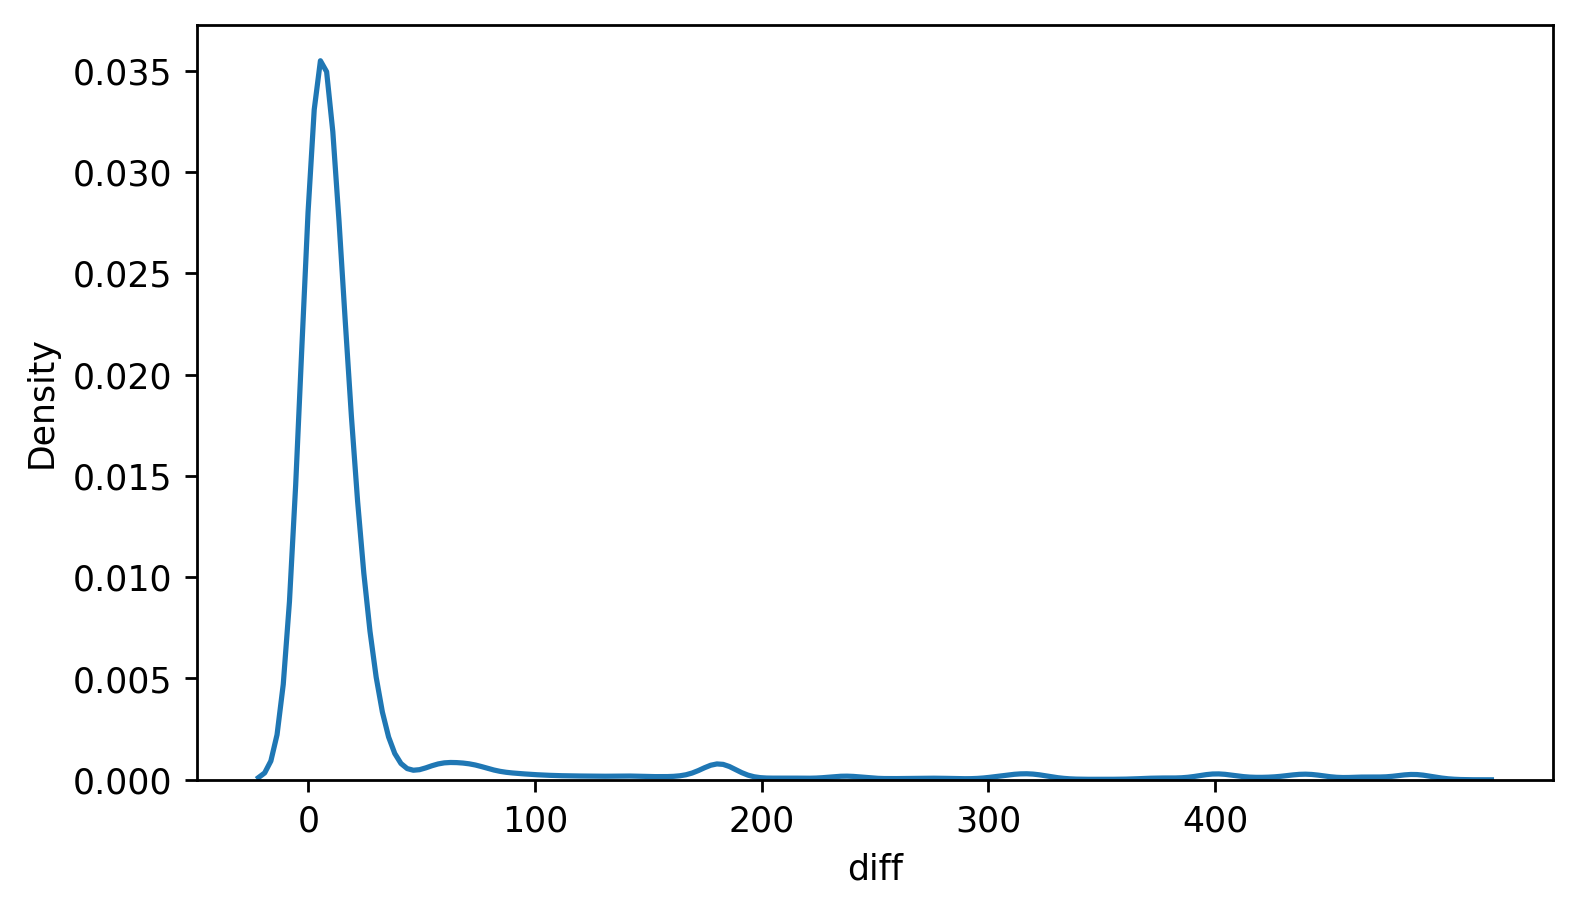

In [61]:
#绘制距离分布的核密度分布

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
fig     = plt.figure(1,(7,4),dpi = 250)    
ax1      = plt.subplot(111)

sns.kdeplot(BUS_GPS[BUS_GPS['diff']<500]['diff'])

plt.xticks(range(0,500,100),range(0,500,100))##实际数据范围和坐标轴显示的数据标签范围，中间是步长
plt.show()

In [62]:
#只筛选保留100米内的坐标点
BUS_GPS = BUS_GPS[BUS_GPS['diff']<100]
BUS_GPS

,"???""BUSRDID""",DATATYPE,ROUTEID,SUBROUTEID,PRODUCTID,STATIONSEQNUM,STATIONNUM,ISARRLFT,ACTDATETIME,RECDATETIME,...,CUSTOMDATA4,CUSTOMDATA5,SEQUENCESWITCHTYPEFLAG,time_st,lons,lats,geometry,project,geometry_orgin,diff
77,30924121145,3,1022,1022,51402072,0.0,0.0,NaN,2021/5/1 5:32:44,2021/5/1 5:32:40,...,2.0,GPS-BD/BD618Q_20170928/GPS:2;BD:0,NaN,19960,163294.908204,3.580577e+06,POINT (163198.64770961175 3580557.1989127495),17187.697115,POINT (163294.90820443956 3580577.4074236243),98.358867
78,30924121288,3,1022,1022,51402072,0.0,0.0,NaN,2021/5/1 5:32:49,2021/5/1 5:32:45,...,2.0,GPS-BD/BD618Q_20170928/GPS:2;BD:0,NaN,19965,163255.372722,3.580571e+06,POINT (163198.20951883664 3580559.2861749483),17185.564353,POINT (163255.3727217316 3580571.28676989),58.409298
79,30924121430,3,1022,1022,51402072,0.0,0.0,NaN,2021/5/1 5:32:54,2021/5/1 5:32:51,...,3.0,GPS-BD/BD618Q_20170928/GPS:4;BD:0,NaN,19971,163233.712488,3.580569e+06,POINT (163197.66332344786 3580561.887902444),17182.905911,POINT (163233.71248789993 3580569.4559077113),36.834996
80,30924121569,3,1022,1022,51402072,0.0,0.0,NaN,2021/5/1 5:32:59,2021/5/1 5:32:56,...,2.0,GPS-BD/BD618Q_20170928/GPS:2;BD:1,NaN,19976,163231.545567,3.580570e+06,POINT (163197.55729533418 3580562.3929529525),17182.389851,POINT (163231.54556734022 3580569.528303396),34.729179
81,30924121728,3,1022,1022,51402072,0.0,0.0,NaN,2021/5/1 5:33:04,2021/5/1 5:33:01,...,2.0,GPS-BD/BD618Q_20170928/GPS:2;BD:1,NaN,19981,163231.545567,3.580570e+06,POINT (163197.55729533418 3580562.3929529525),17182.389851,POINT (163231.54556734022 3580569.528303396),34.729179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145214,30939235825,3,1022,1022,51402061,46.0,100324.0,NaN,2021/5/1 19:45:51,2021/5/1 19:45:49,...,2.0,GPS-BD/BD618Q_20170928/GPS:0;BD:3,NaN,71149,163214.392801,3.580533e+06,POINT (163204.1323097898 3580531.073765264),17214.391762,POINT (163214.39280129882 3580533.227808359),10.484159
145215,30939236276,3,1022,1022,51402061,46.0,100324.0,NaN,2021/5/1 19:45:56,2021/5/1 19:45:54,...,3.0,GPS-BD/BD618Q_20170928/GPS:0;BD:4,NaN,71154,163214.392801,3.580533e+06,POINT (163204.1323097898 3580531.073765264),17214.391762,POINT (163214.39280129882 3580533.227808359),10.484159
145216,30939236661,3,1022,1022,51402061,46.0,100324.0,NaN,2021/5/1 19:46:01,2021/5/1 19:45:59,...,3.0,GPS-BD/BD618Q_20170928/GPS:3;BD:3,NaN,71159,163215.000081,3.580546e+06,POINT (163201.63847977918 3580542.95278556),17202.253792,POINT (163215.00008054025 3580545.7578620845),13.652869
145217,30939236982,3,1022,1022,51402061,46.0,100324.0,NaN,2021/5/1 19:46:06,2021/5/1 19:46:04,...,3.0,GPS-BD/BD618Q_20170928/GPS:2;BD:2,NaN,71164,163235.721584,3.580562e+06,POINT (163199.28022196668 3580554.1860261173),17190.775679,POINT (163235.72158410872 3580561.8363676667),37.235744


In [63]:
##读取22路车所有车辆的索引
PRODUCTID = pd.read_csv(r'F:\data\22_5_1\PRODUCTID.csv',encoding='gbk')
PRODUCTID#这样读取默认第一行是表头
# 首先将pandas读取的数据转化为array
PRODUCTID_array = np.array(PRODUCTID.stack())#data.stack()用来降维
# 然后转化为list形式
PRODUCTID_list =PRODUCTID_array.tolist()

In [64]:
#获取车辆ID表，放进list
#VehicleId = list(BUS_GPS['PRODUCTID'].drop_duplicates())
VehicleId=PRODUCTID_list
#选取第一辆车的数据
tmp = BUS_GPS[BUS_GPS['PRODUCTID'] == VehicleId[0]]
tmp

,"???""BUSRDID""",DATATYPE,ROUTEID,SUBROUTEID,PRODUCTID,STATIONSEQNUM,STATIONNUM,ISARRLFT,ACTDATETIME,RECDATETIME,...,CUSTOMDATA4,CUSTOMDATA5,SEQUENCESWITCHTYPEFLAG,time_st,lons,lats,geometry,project,geometry_orgin,diff
77,30924121145,3,1022,1022,51402072,0.0,0.0,NaN,2021/5/1 5:32:44,2021/5/1 5:32:40,...,2.0,GPS-BD/BD618Q_20170928/GPS:2;BD:0,NaN,19960,163294.908204,3.580577e+06,POINT (163198.64770961175 3580557.1989127495),17187.697115,POINT (163294.90820443956 3580577.4074236243),98.358867
78,30924121288,3,1022,1022,51402072,0.0,0.0,NaN,2021/5/1 5:32:49,2021/5/1 5:32:45,...,2.0,GPS-BD/BD618Q_20170928/GPS:2;BD:0,NaN,19965,163255.372722,3.580571e+06,POINT (163198.20951883664 3580559.2861749483),17185.564353,POINT (163255.3727217316 3580571.28676989),58.409298
79,30924121430,3,1022,1022,51402072,0.0,0.0,NaN,2021/5/1 5:32:54,2021/5/1 5:32:51,...,3.0,GPS-BD/BD618Q_20170928/GPS:4;BD:0,NaN,19971,163233.712488,3.580569e+06,POINT (163197.66332344786 3580561.887902444),17182.905911,POINT (163233.71248789993 3580569.4559077113),36.834996
80,30924121569,3,1022,1022,51402072,0.0,0.0,NaN,2021/5/1 5:32:59,2021/5/1 5:32:56,...,2.0,GPS-BD/BD618Q_20170928/GPS:2;BD:1,NaN,19976,163231.545567,3.580570e+06,POINT (163197.55729533418 3580562.3929529525),17182.389851,POINT (163231.54556734022 3580569.528303396),34.729179
81,30924121728,3,1022,1022,51402072,0.0,0.0,NaN,2021/5/1 5:33:04,2021/5/1 5:33:01,...,2.0,GPS-BD/BD618Q_20170928/GPS:2;BD:1,NaN,19981,163231.545567,3.580570e+06,POINT (163197.55729533418 3580562.3929529525),17182.389851,POINT (163231.54556734022 3580569.528303396),34.729179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138007,30938553631,3,1022,1022,51402072,46.0,100324.0,NaN,2021/5/1 18:33:45,2021/5/1 18:33:41,...,3.0,GPS-BD/BD618Q_20170928/GPS:2;BD:2,NaN,66821,163229.364498,3.580453e+06,POINT (163219.5158415797 3580450.973495031),17295.965830,POINT (163229.364497617 3580453.4272219595),10.149719
138022,30938554701,3,1022,1022,51402072,46.0,100324.0,NaN,2021/5/1 18:33:50,2021/5/1 18:33:46,...,3.0,GPS-BD/BD618Q_20170928/GPS:2;BD:2,NaN,66826,163219.955488,3.580519e+06,POINT (163206.96870535534 3580516.6302336254),17229.112108,POINT (163219.9554884878 3580519.0477686105),13.209883
138038,30938555890,3,1022,1022,51402072,46.0,100324.0,NaN,2021/5/1 18:33:55,2021/5/1 18:33:51,...,3.0,GPS-BD/BD618Q_20170928/GPS:3;BD:1,NaN,66831,163214.050525,3.580546e+06,POINT (163201.63668196404 3580542.961349208),17202.245042,POINT (163214.0505254859 3580545.5674576876),12.684452
138051,30938557095,3,1022,1022,51402072,46.0,100324.0,NaN,2021/5/1 18:34:00,2021/5/1 18:33:56,...,3.0,GPS-BD/BD618Q_20170928/GPS:4;BD:0,NaN,66836,163224.170327,3.580563e+06,POINT (163198.49169233046 3580557.9420798635),17186.937748,POINT (163224.17032666184 3580563.332941006),26.238400


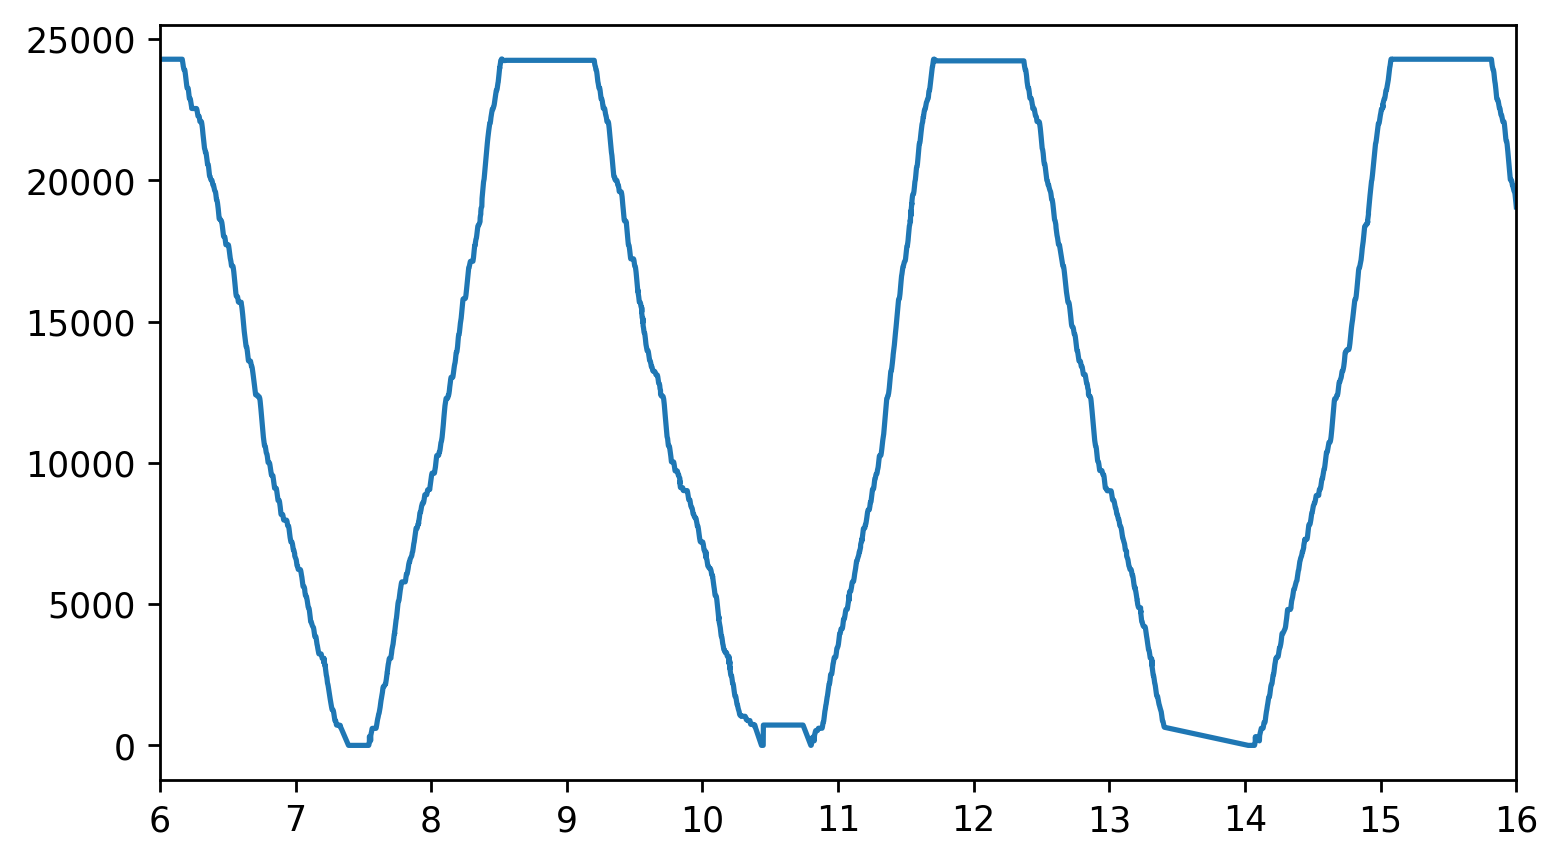

In [65]:
#绘制第一辆车的运行图
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
#mac系统
plt.rcParams["font.family"] = 'Arial Unicode MS'
import seaborn as sns
fig     = plt.figure(1,(7,4),dpi = 250)    
ax1      = plt.subplot(111)

plt.plot(tmp['time_st'],tmp['project'])

plt.xticks(range(0,24*3600+1,3600),range(24+1))

plt.xlim(6*3600,16*3600)
plt.show()

In [66]:
stop

,STATIONNO,ROADNAME,STATIONNAME,LONGITUDE,LATITUDE,lons,lats,geometry
0,105471,东边站台,润扬广场,119.395516,32.371692,160821.703118,3.587353e+06,POINT (160821.7031178251 3587352.9958234834)
1,105473,西边站台,润扬广场,119.395076,32.372544,160783.464584,3.587449e+06,POINT (160783.4645843889 3587448.9168113973)
2,104462,南边站台,开发西路,119.400481,32.363560,161258.785553,3.586435e+06,POINT (161258.78555269964 3586435.052203559)
3,102523,西边站台,邗江河桥,119.428253,32.293386,163613.920857,3.578562e+06,POINT (163613.92085681733 3578562.157219473)
4,114312,南边站台,金山路,119.415326,32.287588,162374.247645,3.577960e+06,POINT (162374.24764529016 3577959.6162920306)
...,...,...,...,...,...,...,...,...
88,115552,南边站台,西郡188花园南门,119.379872,32.375383,159362.651014,3.587812e+06,POINT (159362.65101368434 3587812.2767862207)
89,115683,西边站台,新盛花苑南门,119.347820,32.373815,156339.013563,3.587741e+06,POINT (156339.01356265525 3587741.0005499916)
90,115681,东边站台,新盛花苑南门,119.347558,32.374158,156315.646369,3.587780e+06,POINT (156315.64636858308 3587779.898064424)
91,119702,NaN,金港北苑南门,119.406558,32.294496,161573.669976,3.578754e+06,POINT (161573.66997635894 3578753.687211083)


In [67]:
#地图匹配
lineshp=line['geometry'].iloc[1]
stop['project'] = stop['geometry'].apply(lambda r:lineshp.project(r))
#stop = stop[stop['linename'] == linename]

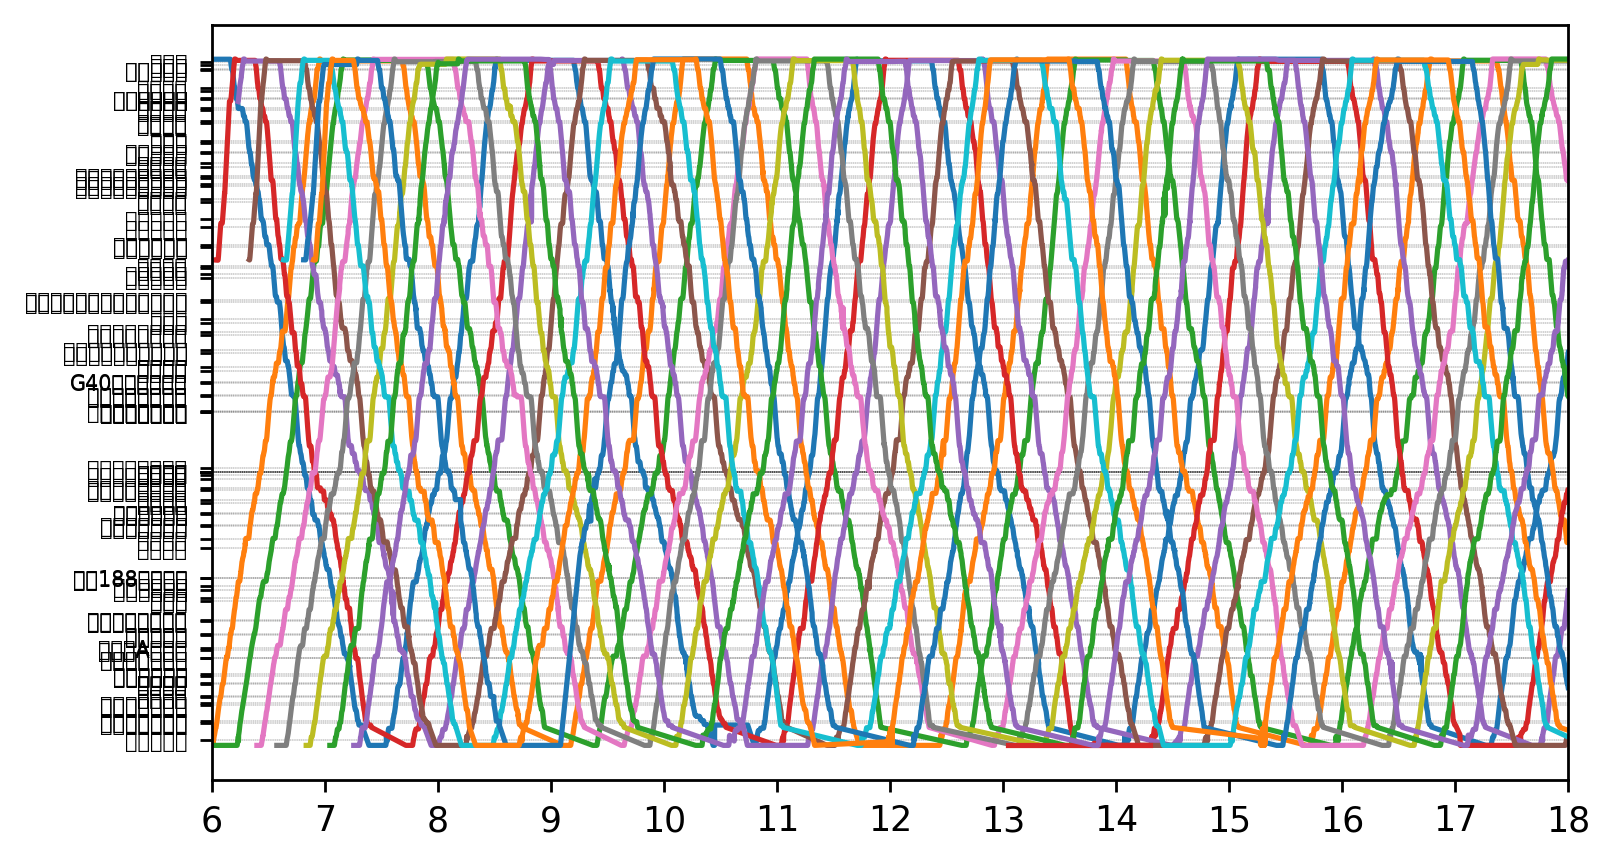

In [68]:
#绘制所有车的运行图
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
fig     = plt.figure(1,(7,4),dpi = 250)    
ax1      = plt.subplot(111)

for i in range(len(stop)):
    project = stop['project'].iloc[i]
    stopname = stop['STATIONNAME'].iloc[i]
    plt.plot([0,24*3600],[project,project],'k--',lw=0.1)

#每辆车绘制一条运行图的曲线
for Vehicle in VehicleId:
    tmp = BUS_GPS[BUS_GPS['PRODUCTID'] == Vehicle]
    plt.plot(tmp['time_st'],tmp['project'])

plt.xticks(range(0,24*3600+1,3600),range(24+1))
plt.yticks(stop['project'],stop['STATIONNAME'],size = 6)

plt.xlim(6*3600,18*3600)
plt.show()